# Linear & Ridge/Lasso Regression

In [54]:
import numpy as np
import pandas as pd

In [55]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 * Standarding the Data & Gaining insights from the Data:
 * using the StandardScaler lib we can preprocessing

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_data = scaler.fit_transform(data)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [58]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [60]:
x = data.drop("quality", axis=1)
y = data["quality"]

In [61]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# Data Visualization

<Axes: >

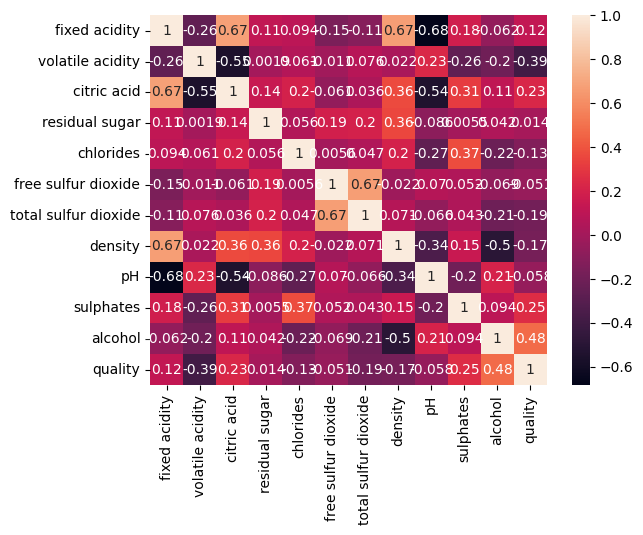

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.heatmap(data.corr() , annot=True)

# Splitting the data into train & test

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, 
                                                     random_state=45,
                                                     stratify=y, 
                                                     test_size=0.2
                                                     )

# 1.Linear Regression model
    Linear Regression is a supervised learning algorithm that models the relationship between input and output using a straight line.

    Linear Regression:
    - Draws a straight line
    - That line best fits the data
    - Used to predict numbers

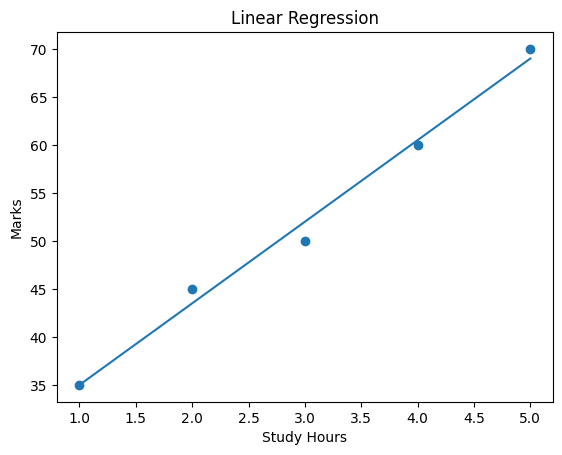

In [69]:
# Student mark prediction
from sklearn.linear_model import LinearRegression
# Input: Study hours
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Output: Marks
y = np.array([35, 45, 50, 60, 70])

model = LinearRegression()
model.fit(X, y)
predicted_marks = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predicted_marks)
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression")
plt.show()


In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [67]:
user_input = (8.1, 0.56, 0.28, 1.7, 0.368, 16.0, 56.0, 0.9968, 3.11, 1.28, 9.3
              )
# Changing the user_input into array
UserInputArray = np.asarray(user_input)

#Reshape the numpy array
UserInputReshape = UserInputArray.reshape(1,-1) #.reshape(-1,1) is needed 
                                 #because ML expects data in column form

prediction = model.predict(UserInputReshape)
print("Prediction: ", prediction)

Prediction:  [5.38936044]


c:\Users\Arjun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 2.Ridge Regression:
    Ridge Regression is a regularized version of linear regression that reduces overfitting by penalizing large coefficients.

 Ridge Regression:
 - Same as Linear Regression
 - But controls large values
 - Reduces overfitting

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, solver="cholesky")
#  alpha controls strictness
#  Higher alpha = more control
ridge.fit(x_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [30]:
user_input = (8.1, 0.56, 0.28, 1.7, 0.368, 16.0, 56.0, 0.9968, 3.11, 1.28, 9.3
              )
# Changing the user_input into array
UserInputArray = np.asarray(user_input)

#Reshape the numpy array
UserInputReshape = UserInputArray.reshape(1,-1)

# prediction = 
print(ridge.predict(UserInputReshape))
# print("Prediction: ", prediction)

[5.4735529]


c:\Users\Arjun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


# 3.Stochastic Gradient Descent model
    Gradient Descent is a method used to find the best values for a model so that errors become minimum.

In regression:

 - Model makes a mistake
 - Gradient Descent reduces that mistake step by step

In [44]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(penalty='l2')
sgd.fit(x_train, y_train)

SGDRegressor()

In [49]:
user_input = (8.1, 0.56, 0.28, 1.7, 0.368, 16.0, 56.0, 0.9968, 3.11, 1.28, 9.3)
# Changing the user_input into array
UserInputArray = np.asarray(user_input)

#Reshape the numpy array
UserInputReshape = UserInputArray.reshape(1,-1)

prediction = sgd.predict(UserInputReshape)
print("Prediction: ", prediction)

Prediction:  [-3.7158428e+11]


c:\Users\Arjun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


# 4.Lasso Regression
    Lasso Regression is a regularization technique that performs feature selection by shrinking some coefficients to zero.

Lasso:
 - Removes useless inputs
 - Makes some values zero

In [ ]:
from sklearn.linear_model import Lasso

lassReg = Lasso()   #Some features may become zero importance
lassReg.fit(x_train, y_train)

Lasso()

In [50]:
user_input = (8.1, 0.56, 0.28, 1.7, 0.368, 16.0, 56.0, 0.9968, 3.11, 1.28, 9.3
              )
# Changing the user_input into array
UserInputArray = np.asarray(user_input)

#Reshape the numpy array
UserInputReshape = UserInputArray.reshape(1,-1)

prediction = lassReg.predict(UserInputReshape)
print("Prediction: ", prediction)

Prediction:  [5.60261227]


c:\Users\Arjun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


# 5.Elastic Regression

In [51]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet()
elasticNet.fit(x_train, y_train)

ElasticNet()

In [52]:
user_input = (8.1, 0.56, 0.28, 1.7, 0.368, 16.0, 56.0, 0.9968, 3.11, 1.28, 9.3
              )
# Changing the user_input into array
UserInputArray = np.asarray(user_input)

#Reshape the numpy array
UserInputReshape = UserInputArray.reshape(1,-1)

prediction = elasticNet.predict(UserInputReshape)
print("Prediction: ", prediction)

Prediction:  [5.59823229]


c:\Users\Arjun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


| Model  | Purpose            |
| ------ | ------------------ |
| Linear | Simple prediction  |
| Ridge  | Reduce overfitting |
| Lasso  | Feature selection  |
